# The Brainy Bunch

Anthony Finch

-------

Hello and welcome to another exciting episode of *Yet Another Data Science Blog*.

Over the past few weeks, we've reviewed several topics in Unsupervised Learning.

* In [Is Bigger Really Better?](https://ajfinch123.github.io/ml/ai/unsupervised/compression/2020/08/31/is_bigger_better.html), we established a groundwork for this entire series on Unsupervised Learning by examining three core types of unsupervised tasks: dimensionality reduction, clustering, and anomaly detection.

* In [Honey, I Shrunk the Data](https://ajfinch123.github.io/ml/ai/unsupervised/compression/2020/09/08/shrunk_data.html), we explored two methods for dimensionality reduction: Principal Components Analysis and Neural Autoencoders.

* In [Acting Out, Part 1](https://ajfinch123.github.io/ml/ai/unsupervised/compression/word2vec/application/2020/09/13/acting_out.html), we examined a revolutionary application of dimensionality reduction called concept or word embedding.

## Disclaimer

I wanted to voice a quick disclaimer on this topic before we start.  This post is going to be pretty high-level, and a lot of the concepts here are explained just as well on Wikipedia or the SKLearn clustering documentation.

I'd like to include this particular post to make sure that we cover all of the unsupervised learning methods; however, clustering isn't a topic that gets me very excited.  There are some experiments in deep clustering that I've toyed around with - maybe we'll do a post on those at some point - but the core clustering algorithms have been around for many decades.  That isn't to say that clustering isn't useful - I've had to use clustering in real projects on several occasions (especially for customer segmentation).  However, I just don't find the core clustering algorithms like K-Means, Gaussian Mixture Models and DBSCAN all that complicated or interesting.

### Objective

Before we dive into the specifics, let's talk about what we want to accomplish.  Clustering is a popular unsupervised learning technique for creating groups of similar observations.  This can be useful for a number of different applications.  Frequently, clustering is used for preliminary data analysis, comparisons between output spaces, or for customer segmentation.  It can also be used to construct targets for unlabeled data or as a preliminary step in anomaly detection.  Generally speaking, clustering is going to be used on an unlabeled data set in order to help the modeler or analyst to understand some of the most common types of points in their data.

When using clustering algorithms, we are implicitly assuming that each cluster has a distinctive *Data Generating Process* (DGP).  This is essentially the same assumption that we make when we use supervised learning; the biggest difference is that, in clustering, we may not know the number of DGPs, or what they really mean.

Let's take a look at the now-famous SciKit-Learn Clustering comparison visualization.  This visualization displays several different datasets (along the columns) and the performance of different clustering algorithms on them (along the rows).  Each distinct color represents a different cluster.

![](./img/sklearn_cluster_comparison.png)

There are a few important things that we can take away from this visualization:

1. There are *a lot* of different clustering methods.
2. Clustering methods perform very differently on different types of datasets (as an example, just look at the performance of DBSCAN on the first few datasets and then look at its performance on the last dataset).
* Clustering methods can take wildly different amounts of time to run (just look at the bottom right-hand corner in each sub-figure; Affinity Propagation took almost 400x longer to run than K-Means on the first dataset).

# So Which One is Best?

This question is frustratingly complicated.  It feels so intuitive to just run the best clustering algorithm and move on.  Alternatively, if there are many different competing algorithms, why not just run all of them and see which one is best?

The problem here is that we may not have an esternal optimization metric that we can employ.  Let's take two contrasting examples for the same application.  Suppose that we're trying to identify customer segments.  In the first example, we're identifying customers who may want to purchase different products.  In that case, we could cluster our customers based on their demographic (or other) variables, and then see how well customer purchasing behavior aligned with those clusters.  We don't want a predictive model of customer purchases, but we can employ that data as a rough evaluation metric.  In this case, we would have an external metric that we could examine after running several different algorithms.

As an alternative, consider an application where we're trying to identify customer segments that may be influenced by different advertisements.  If we don't have prior data on how customers have reacted our previous ads, we can't really evaluate on some external metric.  This kind of application, where we don't really have an external metric, is surprisingly common.  In this case, we really need to understand how different algorithms may behave.

Of course, it's also important to understand these differences because it can be inefficient to run every single possible algorithm and see which ones work best.  This can also lead to overfitting, if we don't retain a validation dataset.

# Clustering Types

There are *many* different clustering algorithms (even more, in fact, than those displayed here).  The key to using this method successfuly is to know your options and to understand your dataset.  While there are many different specific implementations, there are a few rules you can use to think about what kinds of clusters you want.

### Parameter-Learning Methods

The first and (possibly) most intuitive family of clustering algorithms is centroid- or parameter-learning algorithms.  The most popular example is K-Means clustering, followed by Gaussian Mixture Models.

These methods attempt to learn a set of parameters from the data; after that task is complete, the data can be discarded.  In K-Means clustering, we're trying to learn the coordinates for a set of 'centroids', which are basically canonical representatives of the different classes.  We can think of this as learning to look for the stereotypical example of a group of points.  Gaussian Mixture Models take this a step further and look for both a stereotypical example of a group and also the shape of the variance around that group.

Taking the example of customer segmentation, we might look at a group of 10,000 customers and decide that we want 2 clusters.  When our algorithm has finished running, we note that there are two stereotypical customer representations.  Our first stereotypical customer is a young professional that spends most of their time on the computer, and our second stereotypical customer is an older retiree that enjoys reading.  If our goal was to advertise to these different groups, we might choose to target our first cluster with email or Facebook ads, while we would use mailing campaigns to target our second cluster.

There are several advantages to this methodd of identifying clusters.  We can typically select our desired number of clusters, and these algorithms are extremely efficient to compute and retain.  Unfortunately, these methods can also lead to a false sense of security.  Depending on the shape of the underlying data (as above), it's possible that we'll lose a significant amount of granularity and accuracy by reducing an entire population down to a single stereotypical representation.  Moreover, we may end up with many customers getting misallocated to the wrong cluster, since identified clusters may not align with real customer segments (just look at the performance of these methods on the first SKLearn dataset in the graph above).

**Advantages**

* Easy to use and understand.
* Small storage requirements.
* Works well on larger datasets (K-Means; GMM does not scale).
* Choose number of clusters.

**Disadvantages**

* Typically cannot identify complex cluster shapes
* Need to know how many clusters you want before clustering.

### Density and Connection Techniques

In contrast to a technique where we discover stereotypical examples, there is a large family of algorithms that allocates points to clusters based on their positions relative to other points.  In hierarchical clustering, we start with every point in its own cluster, and then clusters are iteratively combined based on a distance rule.

Alternatively, DBSCAN and similar algorithms examine the density of points and try to construct cut-points along low-density regions that divide high-density ones.  This can allow us to construct clusters that reflect the data much more intuitively (see, for instance, the performance of DBSCAN on the first dataset).  I like to visualize this as a diorama.  Where there are a lot of points, we see a mountain on the diorama.  Where there are very few points, we see a valley.  We start filling our diorama with water, which naturally settles in the valleys (the low-density regions).  These rivers, lakes, or other bodies of water will constitute the divides between our clusters in a density-based algorithm.

Ultimately, all of these methods use the connections between data points to construct a *region* where a cluster applies, as opposed to constructing some kind of summary representation of that cluster.  Typically, this means that we have to retain the data in order to obtain a cluster label for new data points (unless we do something clever).

The biggest problem with these algorithms is that they don't tend to work particularly well on large datasets (with more points, we're less likely to have very low-density regions, meaning that we can end up with all of our points being connected) and they don't work well when data has many dimensions (since data is likely to be separated along so many axes).

**Advantages**

* Works on complicated shapes.

**Disadvantes**

* Doesn't work as well with big/wide data.
* Bigger storage requirements/doesn't really allow for prediction.
* Can end up with degenerate clusters (e.g. hundreds of small clusters or one single giant cluster).

# Tricks of the Trade

Here's the thing: I've never seen anyone use anything other than K-Means, Gaussian Mixture, or DBSCAN in practice.  Actually, most applications I've seen really just boil down to K-Means.

I know somone is going to get on my case for that, and I'm sure that isn't true in general.  However, I do think that K-Means is the go-to technique for clustering.  The biggest problem with K-Means is that it doesn't work well for complex data shapes.  Is there anything that we can do to leave us with the advantages of K-Means, while still giving us some of the better performance of other algorithms on data coming from complicated shapes?

Enter: dimensionality reduction and feature compression (sort of).

As demonstrated in [Honey, I Shrunk the Data](https://ajfinch123.github.io/ml/ai/unsupervised/compression/2020/09/08/shrunk_data.html), dimensionality reduction is capable of capturing highly complex relationships between variables and embedding those into another feature space space.  This is exactly the motivation behind [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering), which uses dimensionality-*expansion* before employing a simple K-means (or alternative) clustering algorithm to create highly effective groups.  The idea is that we can create separable groups by expanding the data into more dimensions.

Alternatively, it can also be useful to employ dimensionality reduction when clustering over a high-dimensionality space.  In some cases, we may even want to start by reducing the dimensionality and then blow it back up again.  In the next section, we'll use a dimensionality-expansion technique (Kernel PCA) to blow up the space, then we'll use K-Means to build our clusters.

# Data

We'll start out by import SciKit Learn's `datasets` module, which lets us build datasets like those used in SKLearn's clustering graphic above.

This function is very convenient, since it gives us both the sample data points and the underlying class assignments.

In [4]:
from sklearn import datasets

In [22]:
data = datasets.make_circles(10000, noise = 0.05, factor = 0.5)
data

(array([[-0.10349955, -0.39401849],
        [-0.31215572, -0.9619363 ],
        [-0.86975691, -0.55197513],
        ...,
        [ 0.20876037,  0.45644962],
        [-0.8030704 ,  0.69293587],
        [ 0.50630071, -0.1342842 ]]),
 array([1, 0, 0, ..., 1, 0, 1]))

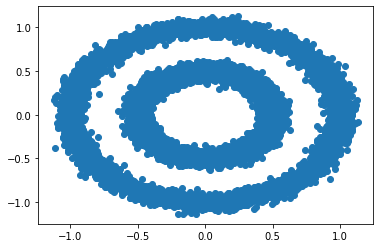

In [23]:
import matplotlib.pyplot as plt

plt.scatter(data[0][:,0], data[0][:,1])

In [78]:
np.random.choice(list(range(10)), 3, replace = False)

array([5, 9, 2])

In [ ]:
def kernel_kmeans(data, nclusters):
    np.random.choice(len(data), size = n_clusters, replace = False)
    
    cluster_centers = dict(zip(
        list(n_clusters),
        data[ndx[i],:]
        for i in n_clusters
    ))
    
    for i in cluster_centers.

In [79]:
data_ = data

In [80]:
data = data_[0]

In [144]:
n_clusters = 2
max_iter = 100000

In [145]:
boo = True
i = 0
while boo:

    clusters_old = [0]*len(data)

    ndx = np.random.choice(len(data), size = n_clusters, replace = False)

    cluster_centers = {
        i : data[ndx[i]]
        for i in range(n_clusters)
    }

    cluster_center_mat = np.stack([cluster_centers[i] for i in range(n_clusters)])

    dists = np.tanh(np.dot(data,cluster_center_mat.transpose())/2+1)

    clusters = np.argmin(dists, axis = 1)

    if np.any(clusters != clusters_old):

        boo = True

        for clust in cluster_centers.keys():
            cluster_centers[clust] = data[np.where(clusters==clust),:].mean(axis = 1)
    
    else:
        boo = False
    i += 1
    
    if i >= max_iter:
        boo = False

In [146]:
cluster_centers

{0: array([[-0.46189435,  0.12120563]]),
 1: array([[ 0.46467062, -0.1203763 ]])}

In [147]:
adjusted_mutual_info_score(clusters, data_[1])

-5.9425270877650376e-05

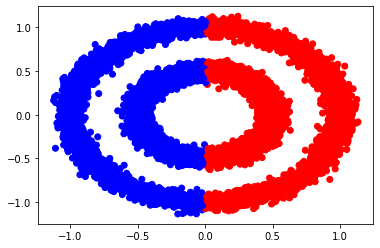

In [161]:
plt.scatter(data_[0][:,0], data_[0][:,1], color = ['r' if x else 'b' for x in clusters])

In [157]:
np.dot(np.tanh(data[0,:]/2+1),np.tanh(data[0,:]/2+1))

0.989269767616518

In [160]:
k = KMeans(2)
clusters = k.fit_predict(k_mat)

In [158]:
np.tanh(np.dot(data[0,:],cluster_center_mat[0,:])/2+1)

0.7943020794073808

In [102]:
cluster_center_mat[0,:]

array([ 0.02534287, -0.9070596 ])

In [159]:
k_mat = sigmoid_kernel(data, data)

In [96]:
cluster_center_mat

array([[-0.54128472, -0.83007702],
       [-0.10625022,  0.57008336],
       [-0.35389282,  0.86022643]])

In [91]:
list(zip(
    (list(range(n_clusters)),
    [data[ndx[i],:]
    for i in range(n_clusters)])
))

[([0, 1, 2],),
 ([array([-0.57424589, -0.86383652]),
   array([ 0.42037011, -0.30902305]),
   array([0.39198637, 0.1734089 ])],)]

### Dimensionality Expansion

We'll use the exact same algorithm that we build in our Honey, I Shrunk the Data

In [62]:
import numpy as np
from sklearn.base import TransformerMixin
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout

class expander(TransformerMixin):
    
    def __init__(self):
        pass
        #self.n_components = n_components

    #SKLearn transformers should take y as an optional argument, even when it isn't necessary, to make sure that they can work with pipelines
    def fit(self, data, y = None): 
        return self
    
    def transform(self, data):
        new_data = np.concatenate([
            np.cos(data), np.sin(data)
        ], axis = 1)
        return new_data

In [63]:
t = expander()

data_t = t.transform(data[0])

In [64]:
data[0]

array([[-0.10349955, -0.39401849],
       [-0.31215572, -0.9619363 ],
       [-0.86975691, -0.55197513],
       ...,
       [ 0.20876037,  0.45644962],
       [-0.8030704 ,  0.69293587],
       [ 0.50630071, -0.1342842 ]])

In [65]:
data_t

array([[ 0.9946487 ,  0.92337381, -0.10331486, -0.38390207],
       [ 0.95167374,  0.57193271, -0.30711089, -0.82030054],
       [ 0.64501233,  0.85149049, -0.76417216, -0.52437005],
       ...,
       [ 0.97828858,  0.89762303,  0.20724734,  0.44076398],
       [ 0.69450086,  0.7693739 , -0.71949188,  0.63879871],
       [ 0.87454444,  0.99099742,  0.48494538, -0.13388099]])

In [67]:
from sklearn.cluster import KMeans

k = KMeans(2)

lab = k.fit_predict(data_t)

In [70]:
from sklearn.metrics import adjusted_mutual_info_score

In [71]:
adjusted_mutual_info_score(lab, data[1])

-6.926689182263368e-05

In [73]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [75]:
ker = sigmoid_kernel(data[0])

In [76]:
ker.shape

(10000, 10000)

In [52]:
from sklearn.decomposition import KernelPCA

In [53]:
kpca = KernelPCA(4)

In [54]:
kpca.fit_transform(data[0])

array([[-0.12315019,  0.38911535, -0.        ,  0.        ],
       [-0.35895529,  0.94630832,  0.        , -0.        ],
       [-0.8961343 ,  0.5099301 ,  0.        , -0.        ],
       ...,
       [ 0.22976601, -0.44530205,  0.        , -0.        ],
       [-0.76948098, -0.7303156 ,  0.        , -0.        ],
       [ 0.49846784,  0.15909519,  0.        ,  0.        ]])

In [39]:
from sklearn.manifold import TSNE

In [41]:
data_t = TSNE(2).fit_transform(data[0])

In [42]:
data_t

array([[ 10.375333,  78.302155],
       [-63.924316,  49.00371 ],
       [-65.90493 ,   1.627245],
       ...,
       [ 11.497115, -56.624928],
       [ 50.19357 , -58.30932 ],
       [ 42.894962,  11.182528]], dtype=float32)

In [27]:
import numpy as np
from sklearn.base import TransformerMixin
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout

class autoencoder(TransformerMixin):
    
    def __init__(self, n_components = 2):
        self.n_components = n_components
        self.pca_mod = None
        self.inv_mod = None
        
    def _build_model(self, n_feats):
        
        inputs = Input(shape = (n_feats,))
        dense_0 = Dense(n_feats*2, activation = 'tanh')(inputs)
        dense_1 = Dense(n_feats*4, activation = 'relu')(dense_0)
        drop_0 = Dropout(0.1)(dense_1)
        dense_2 = Dense(n_feats, activation = 'tanh')(drop_0)
        pca_feats = Dense(self.n_components, activation = 'linear')(dense_1)
        
        pca_inputs = Input(shape = (self.n_components,))
        
        dense01 = Dense(n_feats, activation = 'linear')(pca_inputs)
        dense11 = Dense(n_feats*2, activation = 'tanh')(dense01)
        dense21 = Dense(n_feats*4, activation = 'relu')(dense11)
        drop_1 = Dropout(0.1)(dense21)
        dense31 = Dense(n_feats, activation = 'tanh')(drop_1)
        recon_feats = Dense(n_feats, activation = 'linear')(dense31)
        
        
        self.pca_mod = Model(inputs = inputs, outputs = pca_feats)
        self.inv_mod = Model(inputs = pca_inputs, outputs = recon_feats)
        
        final_out = self.inv_mod(self.pca_mod(inputs))
        
        self.full_inv_mod = Model(inputs = inputs, outputs = final_out)
        
        
        self.full_inv_mod.compile(optimizer = 'adam', loss = 'mean_squared_error')

    #SKLearn transformers should take y as an optional argument, even when it isn't necessary, to make sure that they can work with pipelines
    def fit(self, data, y = None, n_epochs = 10, batch_size = 100, verbose = False): 
        self._build_model(data.shape[1])
        
        self.full_inv_mod.fit(
            np.array(data),
            np.array(data),
            epochs = n_epochs,
            batch_size = batch_size,
            verbose = verbose
        )
        
        return self
    
    def transform(self, data):
        return self.pca_mod.predict(data)
    
    def inverse_transform(self, data):
        return self.inv_mod.predict(data)

In [32]:
ae = autoencoder(1)

In [33]:
data_t = ae.fit_transform(data[0])

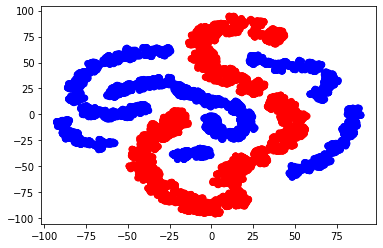

In [49]:
plt.scatter(data_t[:,0], data_t[:,1], color = ['r' if x else 'b' for x in data[1]])